  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

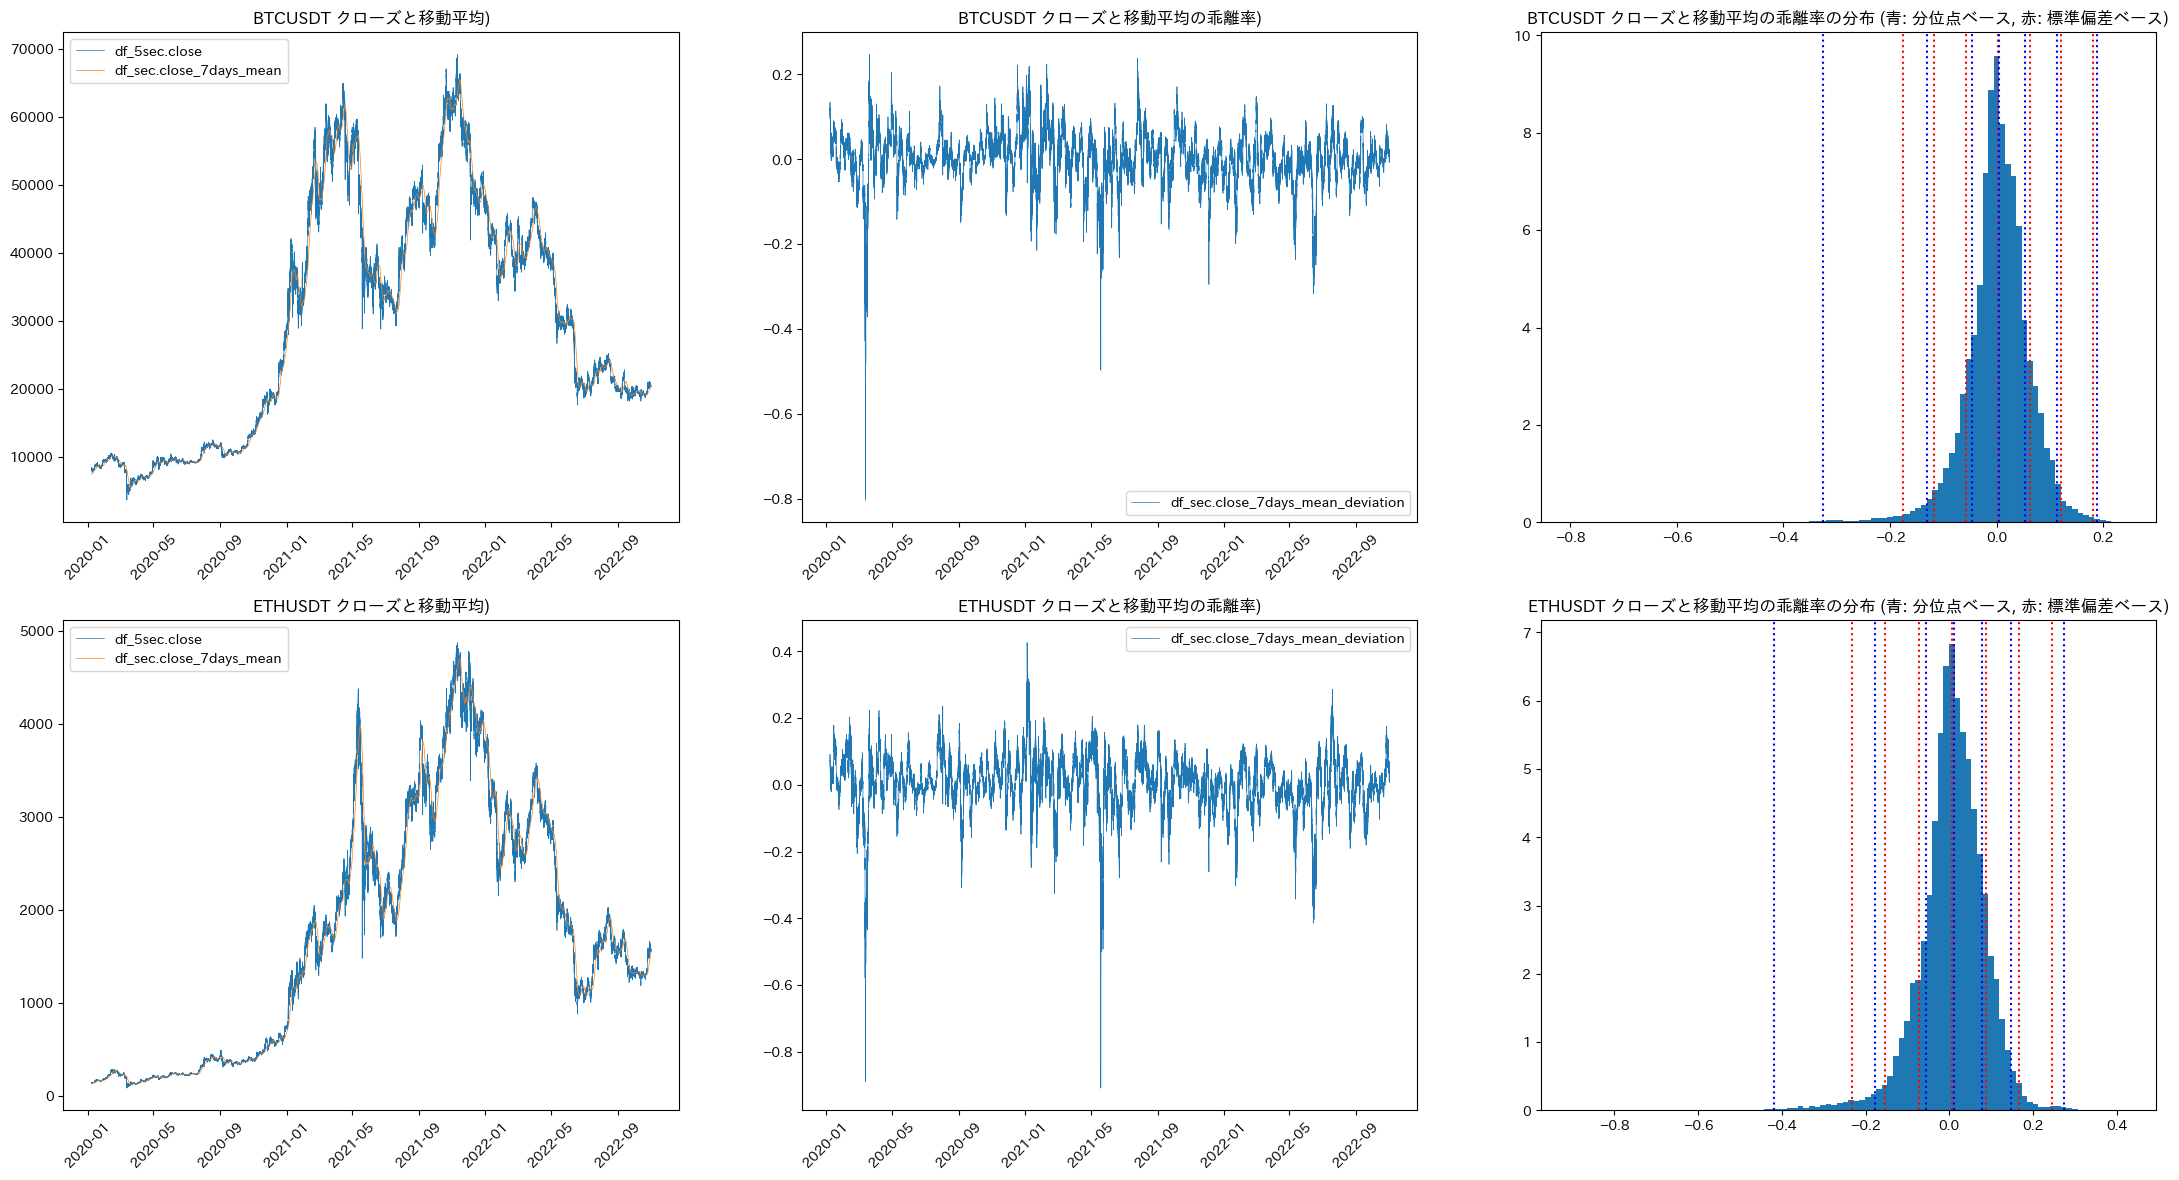

In [3]:
import pandas as pd
import numpy as np
import statsmodels
import matplotlib.pyplot as plt
import japanize_matplotlib
from tqdm.auto import tqdm
import exercise_util

#target_symbols = list(exercise_util.target_symbols.keys())
target_symbols = ['BTCUSDT', 'ETHUSDT']

cols = 3
rows = len(target_symbols)
fig, axs = plt.subplots(rows, cols, figsize = (9 * cols, 7 * rows))

str_start = '2020-01-01'

for _idx, _symbol in tqdm(enumerate(target_symbols), total = len(target_symbols)):
    df_5sec = exercise_util.concat_timebar_files(_symbol, 5, str_start)

    df_5sec['close_7days_mean'] = df_5sec['close'].rolling(7 * 24 * 60 * 60 // 5).mean()

    df_5sec.dropna(inplace = True)

    _ax = axs[_idx, 0]
    _ax.tick_params(axis = 'x', labelrotation = 45)
    _ax.plot(df_5sec['close'], label = 'df_5sec.close', lw = 0.5)
    _ax.plot(df_5sec['close_7days_mean'], label = 'df_sec.close_7days_mean', lw = 0.5)
    _ax.legend()
    _ax.set_title(f'{_symbol} クローズと移動平均)')

    _log_close = np.log(df_5sec['close'])
    _close_ma_deviation = _log_close - np.log(df_5sec['close_7days_mean'])
    _ax = axs[_idx, 1]
    _ax.tick_params(axis = 'x', labelrotation = 45)
    _ax.plot(_close_ma_deviation, label = 'df_sec.close_7days_mean_deviation', lw = 0.5)
    _ax.legend()
    _ax.set_title(f'{_symbol} クローズと移動平均の乖離率)')

    _ax = axs[_idx, 2]
    _ax.hist(_close_ma_deviation, bins = 100, density = True)
    _mean = _close_ma_deviation.mean()
    _std = _close_ma_deviation.std()
    _ax.axvline(_mean, linestyle = 'dotted', color = 'red')
    _ax.axvline(_mean + _std, linestyle = 'dotted', color = 'red')
    _ax.axvline(_mean + -1 * _std, linestyle = 'dotted', color = 'red')
    _ax.axvline(_mean + 2 * _std, linestyle = 'dotted', color = 'red')
    _ax.axvline(_mean + -2 * _std, linestyle = 'dotted', color = 'red')
    _ax.axvline(_mean + 3 * _std, linestyle = 'dotted', color = 'red')
    _ax.axvline(_mean + -3 * _std, linestyle = 'dotted', color = 'red')

    _ax.axvline(_close_ma_deviation.quantile(0.5), linestyle = 'dotted', color = 'blue')
    _ax.axvline(_close_ma_deviation.quantile(0.5 - 0.6827 / 2), linestyle = 'dotted', color = 'blue')
    _ax.axvline(_close_ma_deviation.quantile(0.5 + 0.6827 / 2), linestyle = 'dotted', color = 'blue')
    _ax.axvline(_close_ma_deviation.quantile(0.5 - 0.9545 / 2), linestyle = 'dotted', color = 'blue')
    _ax.axvline(_close_ma_deviation.quantile(0.5 + 0.9545 / 2), linestyle = 'dotted', color = 'blue')
    _ax.axvline(_close_ma_deviation.quantile(0.5 - 0.9973 / 2), linestyle = 'dotted', color = 'blue')
    _ax.axvline(_close_ma_deviation.quantile(0.5 + 0.9973 / 2), linestyle = 'dotted', color = 'blue')

    _ax.set_title(f'{_symbol} クローズと移動平均の乖離率の分布 (青: 分位点ベース, 赤: 標準偏差ベース)')

fig.show()